In [1]:
import numpy as np 
#import scipy 
import matplotlib.pyplot as plt
#from numpy import pi as pi
from scipy.integrate import solve_ivp
from OMPython import ModelicaSystem
# from help_fkt import delete_OM_files

t_max=3;
v_0=5;
h_0=10;
g=9.81;
alpha=0.001;

def xdot_fkt(t, x, *args):
    theta, omega = x
    xdot= [x[1], -g-alpha*x[1]**3]
    return xdot

def hit_ground(t, y, *args): return y[0]

hit_ground.terminal = True
hit_ground.direction=-1

h_0_neu=h_0
v_0_neu=v_0
t_0_neu=0

h=np.array([])
v=np.array([])
t_ges=np.array([])
for k in range(11):
    # hier ist es ungeschickt, t_eval vorzugeben, weil dann der Zero Crossing Punkt nicht drin ist
    # besser: max_step
    sol = solve_ivp(xdot_fkt, [t_0_neu, 100], [h_0_neu, v_0_neu], max_step=0.1, events=hit_ground, args=(g, alpha))
    t=sol.t; x=sol.y;
    t_0_neu=t[-1]
    h_0_neu=0
    v_0_neu=-x[1,-1]
    t_ges=np.append(t_ges, t)
    h=np.append(h, x[0])
    v=np.append(v, x[1])

# Ergänzen Sie hier die Berechnung mit Modelica:
t_vec_mo=np.linspace(0, t_ges[-1], 100)
h_mo=np.zeros(100)
v_mo=np.zeros(100)

modelname='bounce'
mod=ModelicaSystem(modelname+'.mo',modelname)
mod.setSimulationOptions('stopTime=30.0') #unnötig?
mod.simulate()
[v_mo]=mod.getSolutions('v')
[h_mo]=mod.getSolutions('h')
# delete_OM_files(modelname)

h_mo = h_mo[0:100]     # slice array for fist 100 entries
v_mo = v_mo[0:100]
#----------------------------------------------- 


Ende


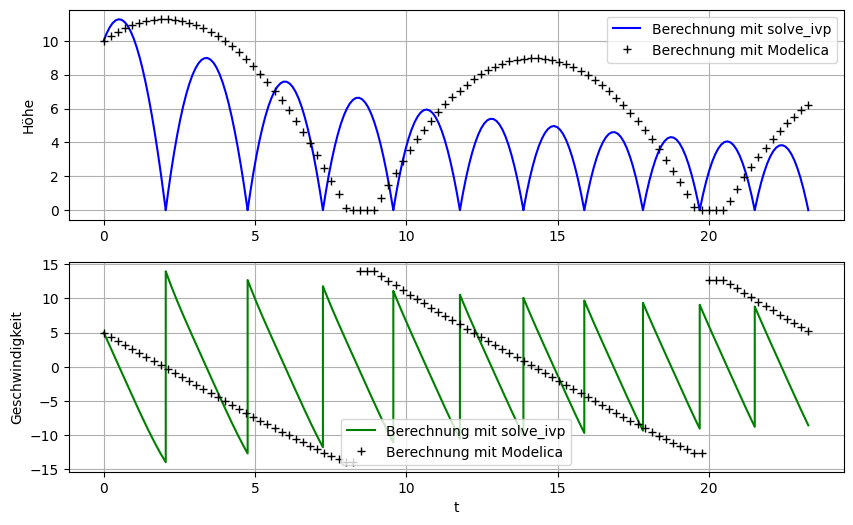

In [2]:

fig=plt.figure(1, figsize=(10,6)); fig.clf()
ax = fig.add_subplot(211)
ax.plot(t_ges, h, 'b', label='Berechnung mit solve_ivp')
ax.plot(t_vec_mo, h_mo, 'k+', label='Berechnung mit Modelica')
ax.set_ylabel('Höhe')
ax.legend(loc='best')
ax.grid()
ax = fig.add_subplot(212)
ax.plot(t_ges, v, 'g', label='Berechnung mit solve_ivp')
ax.plot(t_vec_mo, v_mo, 'k+', label='Berechnung mit Modelica')
ax.set_ylabel('Geschwindigkeit')
ax.legend(loc='best')
ax.set_xlabel('t')
ax.grid()
plt.plot()

print("Ende")
